In [54]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

INPUT_DIR = "/disco/dhbb/text" # Diretório com os verbetes
INDEX_SAVE_PATH = "/disco/indexes" # Diretório com a base vetorial
EMBEDDING_MODEL = "sentence-transformers/all-MiniLM-L6-v2" # Modelo de embedding

# Análise do repositório DHBB

In [55]:
text_files = glob.glob(os.path.join(INPUT_DIR, "**/*.text"), recursive=True)

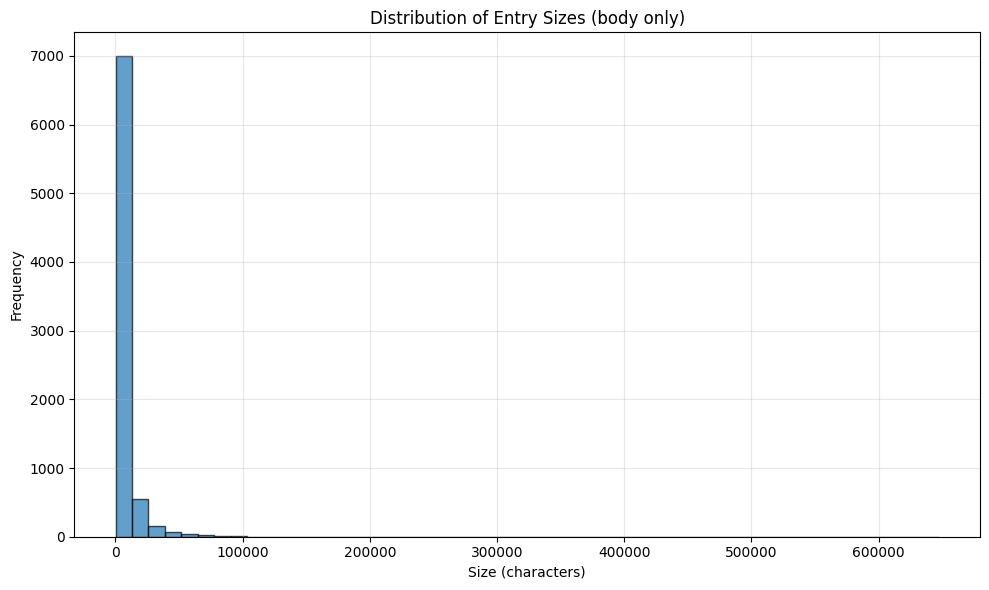

In [56]:
# Coletar tamanhos dos verbetes sem o cabeçalho YAML
sizes = []
for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        if content.startswith("---"):
            parts = content.split("---", 2)
            if len(parts) >= 3:
                body = parts[2]
                sizes.append(len(body))
            else:
                sizes.append(len(content))
        else:
            sizes.append(len(content))

plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Size (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Entry Sizes (body only)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [57]:
# Encontrar os 10 maiores arquivos
largest_indices = np.argsort(sizes)[-10:][::-1]

print("Top 10 maiores arquivos:")
for idx in largest_indices:
    header = yaml_headers[idx] if idx < len(yaml_headers) else None
    length = sizes[idx]
    print(f"Arquivo #{idx}:")
    print(f"  Header: {header}")
    print(f"  Tamanho: {length} caracteres\n")

Top 10 maiores arquivos:
Arquivo #6007:
  Header: {'title': 'VARGAS, Getúlio', 'natureza': 'biográfico', 'sexo': 'm', 'cargos': ['dep. fed. RS 1923-1926', 'min. Faz. 1926-1927', 'pres. RS 1928-1930', 'rev. 1930', 'pres. Rep. 1930-1945', 'const. 1946', 'sen. RS 1946-1949', 'pres. Rep. 1951-1954'], 'autor': ['Paulo Brandi']}
  Tamanho: 647298 caracteres

Arquivo #3611:
  Header: {'title': 'DUTRA, Eurico Gaspar', 'natureza': 'biográfico', 'sexo': 'm', 'cargos': ['militar', 'comte. 1ª RM 1935-1936', 'min. Guerra 1936-1945', 'pres. Rep. 1946-1951'], 'autor': ['Mauro Malin']}
  Tamanho: 261030 caracteres

Arquivo #3503:
  Header: {'title': 'ARANHA, OSVALDO', 'natureza': 'biográfico', 'sexo': 'm', 'cargos': ['dep. fed. RS 1927-1928', 'rev. 1930', 'min. Just. 1930-1931', 'min. Faz. 1931-1934', 'emb. Bras. EUA 1934-1937', 'min. Rel. Ext. 1938-1944', 'emb. Bras. ONU 1947', 'min. Faz. 1953-1954'], 'autor': ['Regina da Luz Moreira']}
  Tamanho: 245965 caracteres

Arquivo #3109:
  Header: {'title':

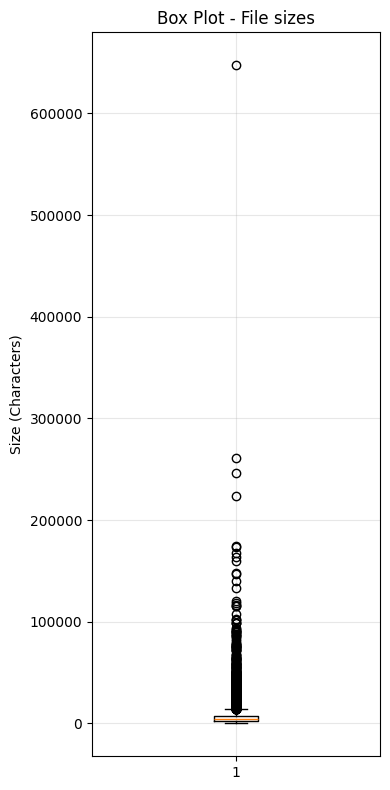

In [58]:
# 2. Box plot
plt.figure(figsize=(4, 8))
plt.boxplot(sizes, vert=True)
plt.ylabel('Size (Characters)')
plt.title('Box Plot - File sizes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
# Estatísticas adicionais
print(f"\nEstatísticas detalhadas:")
print(f"Média: {np.mean(sizes):.2f} caracteres")
print(f"Mediana: {np.median(sizes):.2f} caracteres")
print(f"Desvio padrão: {np.std(sizes):.2f} caracteres")
print(f"Q1 (25%): {np.percentile(sizes, 25):.2f} caracteres")
print(f"Q3 (75%): {np.percentile(sizes, 75):.2f} caracteres")
print(f"P90: {np.percentile(sizes, 90):.2f} caracteres")
print(f"P95: {np.percentile(sizes, 95):.2f} caracteres")
print(f"P99: {np.percentile(sizes, 99):.2f} caracteres")


Estatísticas detalhadas:
Média: 7234.40 caracteres
Mediana: 4047.00 caracteres
Desvio padrão: 14110.94 caracteres
Q1 (25%): 2420.50 caracteres
Q3 (75%): 7117.00 caracteres
P90: 13792.00 caracteres
P95: 22376.40 caracteres
P99: 58364.92 caracteres


In [60]:
import yaml

# Analisar cabeçalhos YAML
yaml_headers = []
files_with_yaml = 0
files_without_yaml = 0

for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        
        if content.startswith("---"):
            parts = content.split("---", 2)
            if len(parts) >= 3:
                _, header, body = parts
                try:
                    metadata = yaml.safe_load(header)
                    if metadata:
                        yaml_headers.append(metadata)
                        files_with_yaml += 1
                    else:
                        files_without_yaml += 1
                except:
                    files_without_yaml += 1
            else:
                files_without_yaml += 1
        else:
            files_without_yaml += 1

print(f"Arquivos com cabeçalho YAML: {files_with_yaml}")
print(f"Arquivos sem cabeçalho YAML: {files_without_yaml}")
print(f"Total de arquivos: {len(text_files)}")

Arquivos com cabeçalho YAML: 7863
Arquivos sem cabeçalho YAML: 0
Total de arquivos: 7863


In [61]:
# Analisar campos presentes nos cabeçalhos YAML
all_keys = set()
key_counts = Counter()

for header in yaml_headers:
    if isinstance(header, dict):
        for key in header.keys():
            all_keys.add(key)
            key_counts[key] += 1

print(f"\nTotal de campos únicos encontrados: {len(all_keys)}")
print(f"\nCampos mais comuns nos cabeçalhos YAML:")
for key, count in key_counts.most_common(20):
    percentage = (count / files_with_yaml) * 100
    print(f"  {key}: {count} ({percentage:.1f}%)")


Total de campos únicos encontrados: 7

Campos mais comuns nos cabeçalhos YAML:
  title: 7863 (100.0%)
  natureza: 7863 (100.0%)
  sexo: 6890 (87.6%)
  cargos: 6890 (87.6%)
  autor: 2849 (36.2%)
  tipo: 973 (12.4%)
  subtipo: 873 (11.1%)


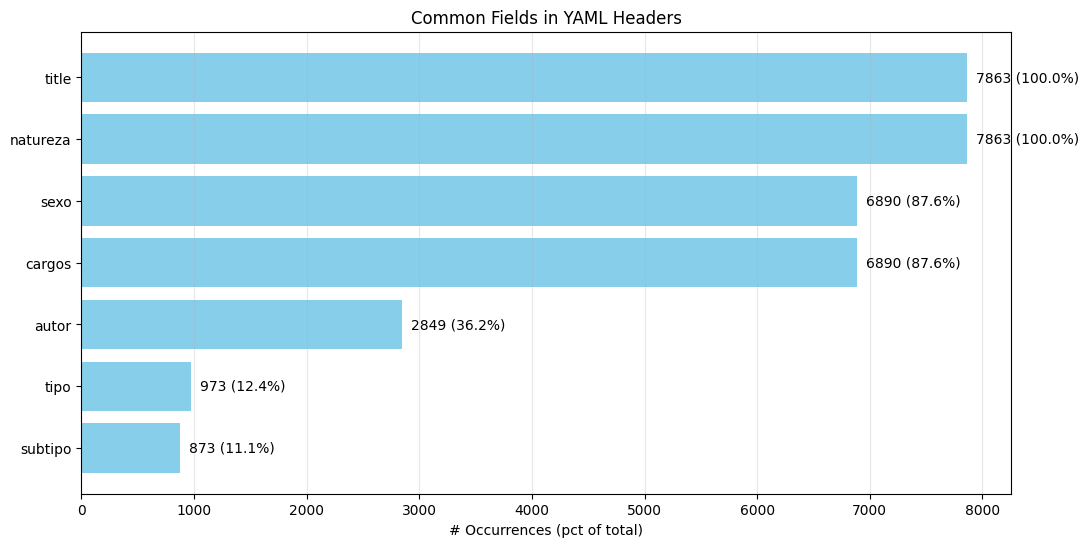

In [62]:
key_counts = Counter()
files_with_yaml = 0

for file_path in text_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        if content.startswith('---'):
            end = content.find('---', 3)
            if end != -1:
                yaml_header = content[3:end]
                try:
                    data = yaml.safe_load(yaml_header)
                    if isinstance(data, dict):
                        key_counts.update(data.keys())
                        files_with_yaml += 1
                except Exception:
                    pass

# Visualizar distribuição dos campos mais comuns
top_fields = key_counts.most_common(15)
fields, counts = zip(*top_fields)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(range(len(fields)), counts, color='skyblue')
ax.set_yticks(range(len(fields)))
ax.set_yticklabels(fields)
ax.set_xlabel('# Occurrences (pct of total)')
ax.set_title('Common Fields in YAML Headers')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

# Adicionar valores nas barras
for i, (bar, count) in enumerate(zip(bars, counts)):
    percentage = (count / files_with_yaml) * 100
    ax.text(bar.get_width() + max(counts) * 0.01, bar.get_y() + bar.get_height()/2, 
            f'{count} ({percentage:.1f}%)', va='center')

plt.show()